# Fraud Detection

[Credit card data](https://www.kaggle.com/dalpozz/creditcardfraud).

In [2]:
import numpy as np
import pandas as pd

In [25]:
def get_fraud_percentage():
    df = pd.read_csv('fraud_data.csv')
    return (df[df['Class']==1].shape[0]/df.shape[0]) * 100

get_fraud_percentage()

1.6410823768035772

In [26]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
def get_dummy_classifier_accuracy_and_recall():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dc = DummyClassifier()
    dc.fit(X_train, y_train)
    
    y_pred=dc.predict(X_test)
    
    rc = recall_score(y_test, y_pred)
    acc = dc.score(X_test, y_test)
    return (acc, rc)

dummyAccuracy, dummyRecall = get_dummy_classifier_accuracy_and_recall()

print("Dummy Accuracy: ", dummyAccuracy)
print("Dummy Recall: ", dummyRecall)

Dummy Accuracy:  0.967551622419
Dummy Recall:  0.0125


In [28]:
def get_accuracy_recall_and_precision():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    svc=SVC()
    svc.fit(X_train, y_train)
    y_pred=svc.predict(X_test)
    
    acc=svc.score(X_test, y_test)
    rc=recall_score(y_test, y_pred)
    pc=precision_score(y_test, y_pred)
    
    return (acc,rc,pc)

accuracy, recall, precision = get_accuracy_recall_and_precision()

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)

Accuracy:  0.990781710914
Recall:  0.375
Precision: 1.0


In [13]:
def get_confusion_matrix():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc=SVC(C=1e9, gamma=1e-07)
    svc.fit(X_test, y_test)
    
    y_df = svc.decision_function(X_test)
    
    cm=confusion_matrix(y_test, y_df < -220)
    
    return cm

get_confusion_matrix()

array([[ 174, 5170],
       [  73,    7]])

<IPython.core.display.Javascript object>


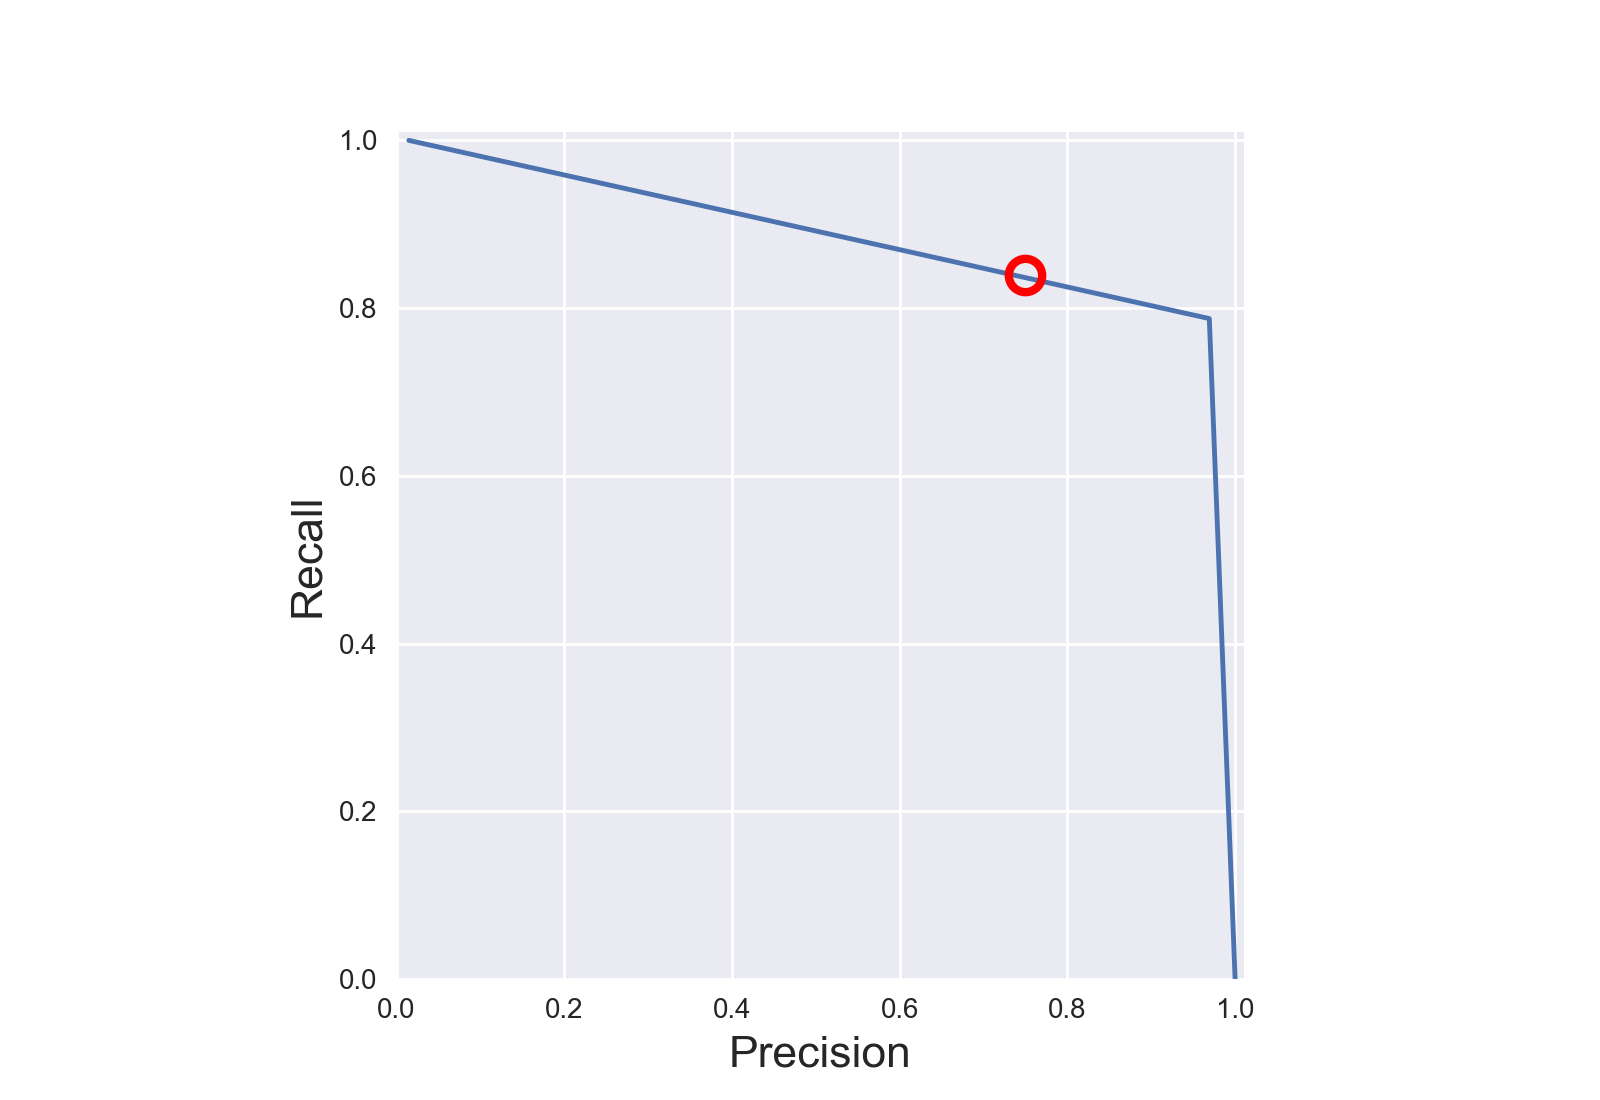

<IPython.core.display.Javascript object>


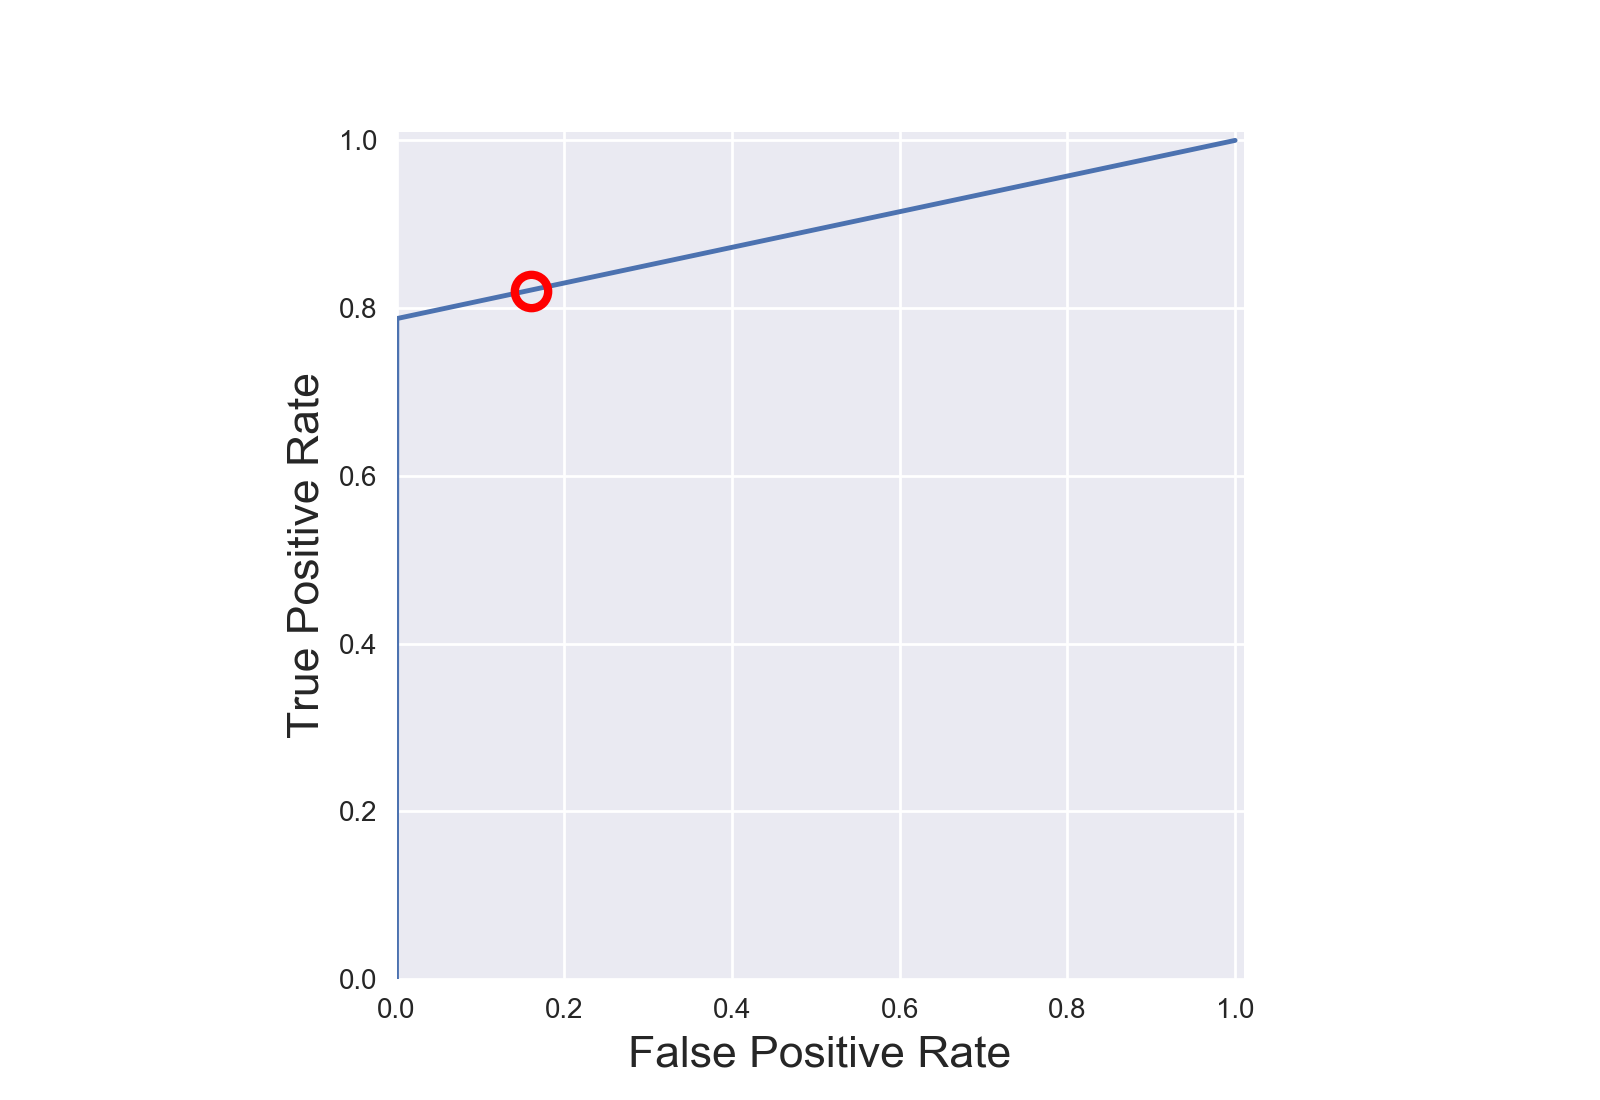

In [29]:
def plot_precision_recall_and_FPR_to_TPR():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    import matplotlib.pyplot as plt
    
    cls = LogisticRegression()
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    
    precision, recall, threshold1 = precision_recall_curve(y_test, y_pred)
    fpr, tpr, threshold2 = roc_curve(y_test, y_pred)
    
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(0.75, 0.84, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

    
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    
    
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(fpr, tpr, label='FPR - TPR Curve')
    plt.plot(0.16, 0.82, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()

plot_precision_recall_and_FPR_to_TPR()

In [23]:
def get_mean_test_scores():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import Pipeline
    
    pipeline = Pipeline([('clf', LogisticRegression()),])
    
    parameters = {'clf__penalty': ('l1', 'l2'), 'clf__C': (0.01, 0.1, 1, 10, 100)}
    grid= GridSearchCV(pipeline, param_grid=parameters, scoring='recall', verbose=2)
    print(pipeline.get_params().keys())
    grid.fit(X, y)
    results = grid.cv_results_
    return results

results=get_mean_test_scores();

dict_keys(['steps', 'clf', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] clf__C=0.01, clf__penalty=l1 ....................................
[CV] ..................... clf__C=0.01, clf__penalty=l1, total=   0.0s
[CV] clf__C=0.01, clf__penalty=l1 ....................................
[CV] ..................... clf__C=0.01, clf__penalty=l1, total=   0.0s
[CV] clf__C=0.01, clf__penalty=l1 ....................................
[CV] ..................... clf__C=0.01, clf__penalty=l1, total=   0.0s
[CV] clf__C=0.01, clf__penalty=l2 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... clf__C=0.01, clf__penalty=l2, total=   0.1s
[CV] clf__C=0.01, clf__penalty=l2 ....................................
[CV] ..................... clf__C=0.01, clf__penalty=l2, total=   0.1s
[CV] clf__C=0.01, clf__penalty=l2 ....................................
[CV] ..................... clf__C=0.01, clf__penalty=l2, total=   0.1s
[CV] clf__C=0.1, clf__penalty=l1 .....................................
[CV] ...................... clf__C=0.1, clf__penalty=l1, total=   0.1s
[CV] clf__C=0.1, clf__penalty=l1 .....................................
[CV] ...................... clf__C=0.1, clf__penalty=l1, total=   0.0s
[CV] clf__C=0.1, clf__penalty=l1 .....................................
[CV] ...................... clf__C=0.1, clf__penalty=l1, total=   0.1s
[CV] clf__C=0.1, clf__penalty=l2 .....................................
[CV] ...................... clf__C=0.1, clf__penalty=l2, total=   0.2s
[CV] clf__C=0.1, clf__penalty=l2 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.4s finished


In [24]:
results

{'mean_fit_time': array([ 0.04074534,  0.09605416,  0.0557042 ,  0.14965034,  0.1786077 ,
         0.26019565,  0.2142481 ,  0.24985258,  0.22568933,  0.24491541]),
 'mean_score_time': array([ 0.00219226,  0.00248305,  0.00193771,  0.00198499,  0.001978  ,
         0.00196497,  0.00198563,  0.00202711,  0.00199525,  0.00191617]),
 'mean_test_score': array([ 0.69662337,  0.75834567,  0.79212371,  0.80057416,  0.80337566,
         0.80337566,  0.79497153,  0.79777303,  0.79497153,  0.79497153]),
 'mean_train_score': array([ 0.69240861,  0.7682516 ,  0.79633963,  0.80476663,  0.80758548,
         0.80898013,  0.80898604,  0.80898604,  0.80898604,  0.80898604]),
 'param_clf__C': masked_array(data = [0.01 0.01 0.1 0.1 1 1 10 10 100 100],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_clf__penalty': masked_array(data = ['l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2'],
              mask = [False False False False False 

<IPython.core.display.Javascript object>


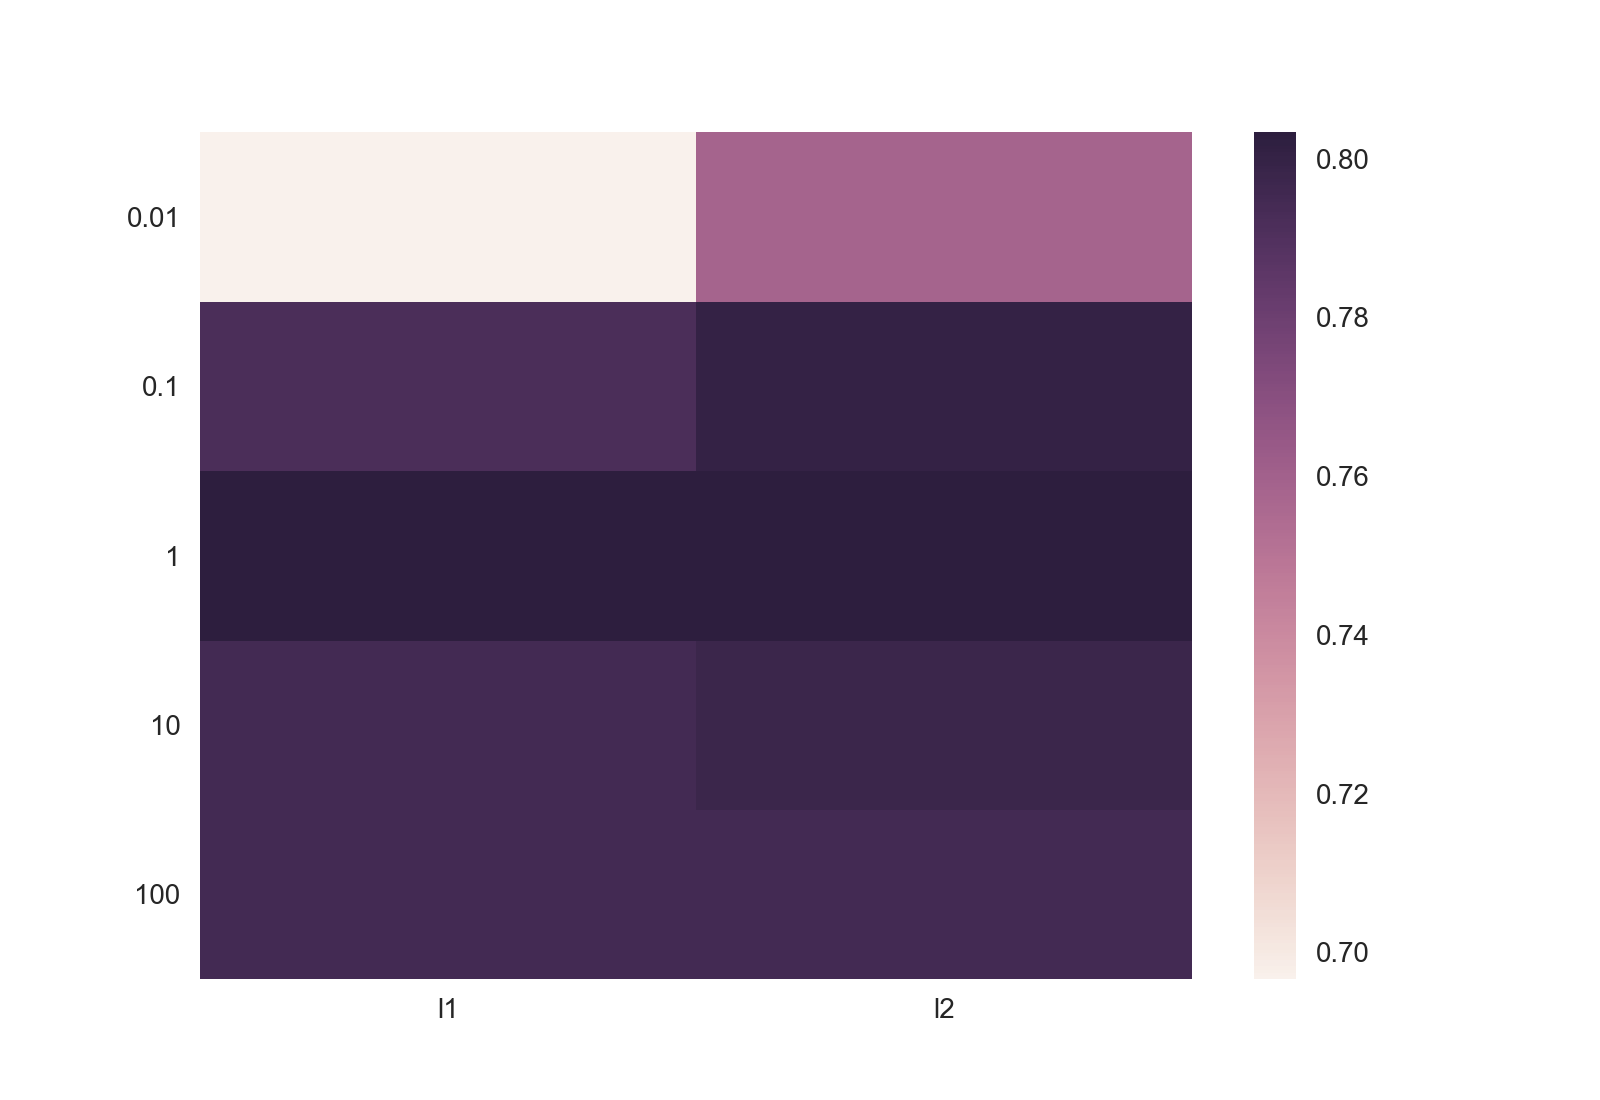

In [19]:
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(results['mean_test_score'].reshape(5, 2))